**Gather data - California housing prices project**

In [144]:
import os
import tarfile
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [145]:
URL = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz'
PATH = os.path.join('datasets', 'task01d')
FILENAME = 'housing.tgz'

def getData(url=URL, path=PATH, filename=FILENAME):
    # create the directory locally to store the dataset
    if not os.path.isdir(path):
        os.makedirs(path)
    filepath = os.path.join(path, filename)    
    urllib.request.urlretrieve(url, filepath) # we store our downloaded file as the format: (path\filename.ext)
    # de-compress our file
    tar_obj = tarfile.open(filepath)
    data = tar_obj.extractall(path) # to decompress the file and put the extracts at the given path i.e. the above directory.
    tar_obj.close()

In [21]:
getData()

**Load data**

In [146]:
def loadData(path=PATH):
    filepath = os.path.join(path, 'housing.csv')
    df_org = pd.read_csv(filepath)
    # print the first 5 rows
    return df_org

**Take aquick look at the data structure**

#### each row represents a single disrtict in california

In [147]:
loadData().head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [148]:
df_org = loadData()

In [149]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [150]:
df_org[df_org['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [151]:
df_org.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [152]:
df_org.describe() # to show a summary of numerical attributes in the dataframe.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


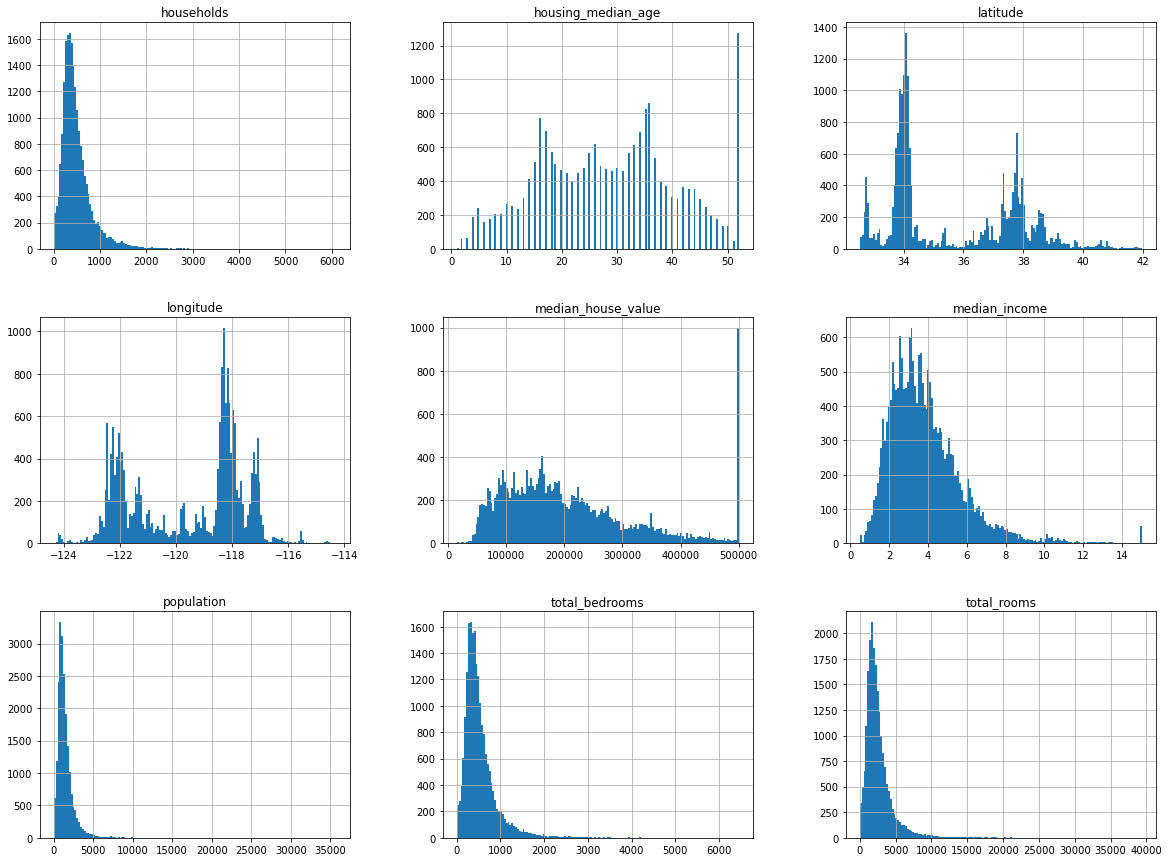

In [153]:
df_org.hist(figsize=(20, 15), bins=150)
plt.show() # .show is not critical/essential in jupyter notebook, but otherwise it's. without it, nothing will be rendered.

In [154]:
np.random.permutation(15)

array([ 1,  5, 10,  2, 13,  0,  3,  8, 12, 11, 14,  4,  7,  6,  9])

### Split the dataset into train & test sets

In [155]:
from sklearn.model_selection import train_test_split

In [156]:
df_train, df_test = train_test_split(df_org, test_size=0.2, random_state=42)

In [157]:
df_train.shape, df_test.shape, df_org.shape

((16512, 10), (4128, 10), (20640, 10))

### To ensure that our splitting is stratified to include all possible strata of the dataset.
### we use a certain attribute like _median_income_ as an indicator as it has a strong impact on the target attribute.

In [158]:
# discretize(categorize) the median_income attribute to be used in stratifing the dataframe.
df_org['income_cut'] = pd.cut(df_org['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

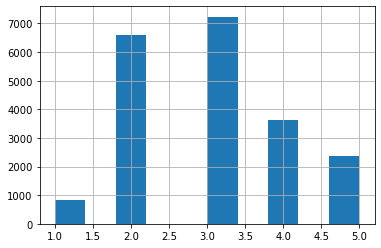

In [159]:
df_org.income_cut.hist()
plt.show()

In [160]:
df_org.income_cut.value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cut, dtype: int64

In [845]:
from sklearn.model_selection import StratifiedShuffleSplit
obj = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in obj.split(df_org, df_org.income_cut):
    df_train = df_org.loc[train_idx]
    df_test = df_org.loc[test_idx]

In [846]:
df_train.shape, df_test.shape, df_org.shape

((16512, 11), (4128, 11), (20640, 11))

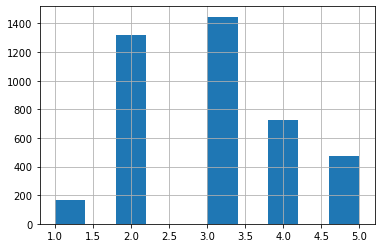

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cut, dtype: float64

In [163]:
df_test.income_cut.hist()
plt.show()
df_test.income_cut.value_counts() / len(df_test)

In [164]:
# to drop the income_cut attribute from the created train, test dataframes to return to there original states.
for df_ in (df_train, df_test):
    df_.drop('income_cut', axis=1, inplace=True)

In [165]:
df_test.info() # we can see that the no. of columns here returned again to 10 columns only.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 5241 to 2398
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4079 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


### Discover and visualize data

In [166]:
# take a copy of your training dataset to keep it safe during this phase.
df_copy = df_train.copy()

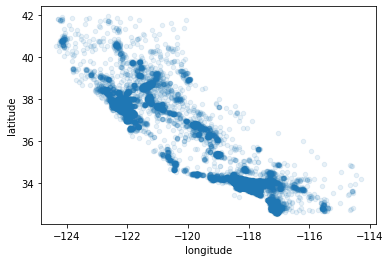

In [167]:
# with alpha=0.1 we can see the points with high concentration.
df_copy.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)
plt.show() # in jupyter notebook the .show() is not necessary, but I prefer not to forget it.

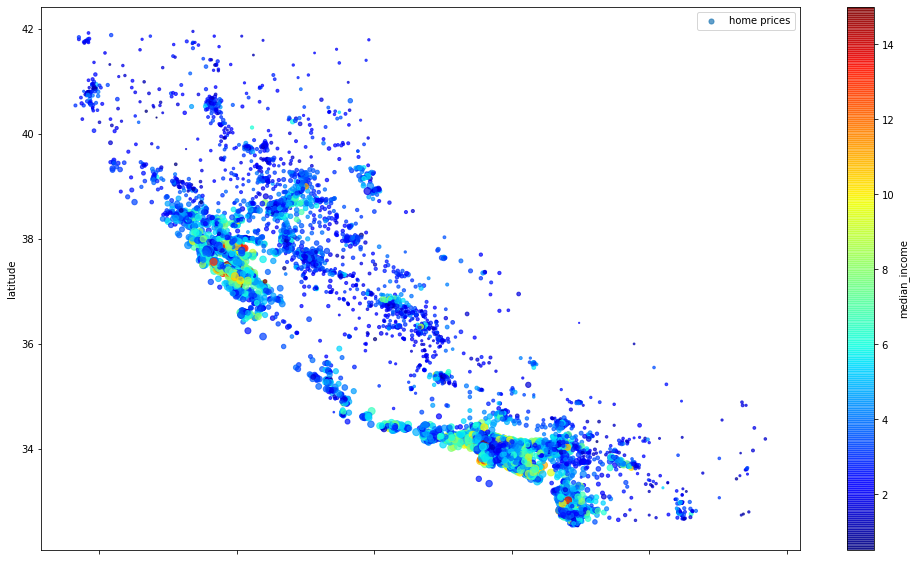

In [168]:
# here the circle radius represents the population, colors represent the house prices
df_copy.plot(kind='scatter', x='longitude', y='latitude', alpha=0.7, s=df_copy.median_house_value/10000, label='home prices', c='median_income', cmap=plt.get_cmap('jet'), colorbar=True, figsize=(17, 10))
plt.legend()
plt.show()

In [169]:
# we can compute the corelation coeffecient between each pair of the attributes in the dataset as the no. of attributes is not large.
cor_mat = df_copy.corr()
cor_mat.median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

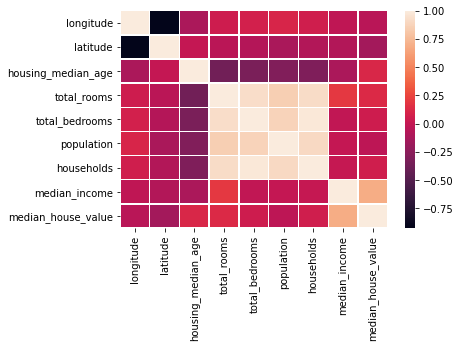

In [170]:
import seaborn as sns

sns.heatmap(cor_mat, linewidth=0.5)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000228225707F0>,
      dtype=object)

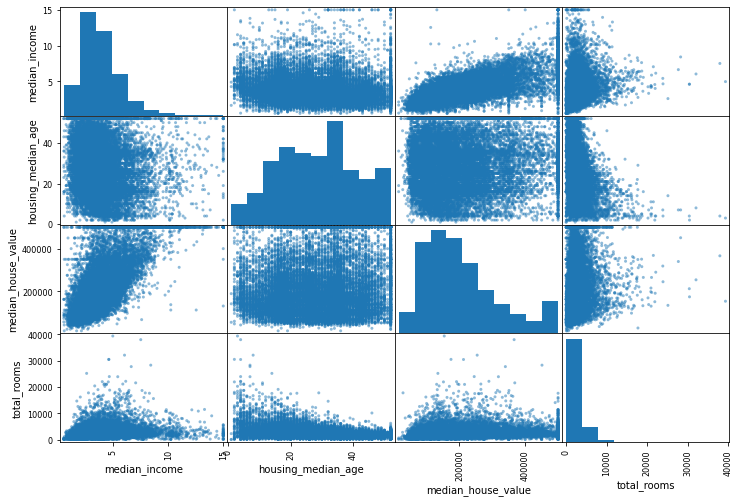

In [171]:
# implement a sccatter plot matrix for each pair of attributes in the daatframe
from pandas.plotting import scatter_matrix
attrs_interest = ['median_income', 'housing_median_age', 'median_house_value', 'total_rooms'] # because we have 10 attributes so the plotting will be 10^2 which will not fit in the display.
scatter_matrix(df_copy[attrs_interest], figsize=(12, 8)) # the best relationship is between the income and the value of house price.
# df_copy[attrs_interest]

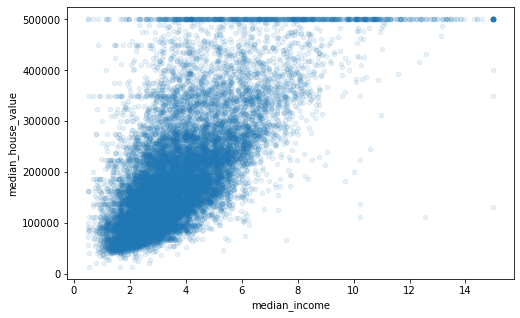

In [172]:
df_copy.plot(kind='scatter', x='median_income', y='median_house_value', figsize=(8, 5), alpha=0.1) # we can see the caping effect.

In [173]:
# to complete out feature engineering steps, we have to try to extract more useful combination of attributes that may have positive impact or neagtive impact on the target attribute which is the median_house_price.
# so we may try to combine some useful and related attributes and explore the effect.
df_copy['room_per_household'] = df_copy.total_rooms/df_copy.households
df_copy['bed_per_room'] = df_copy.total_bedrooms/df_copy.total_rooms
df_copy['population_per_household'] = df_copy.population/df_copy.households

In [174]:
cor_mat = df_copy.corr()
cor_mat.median_house_value.sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
room_per_household          0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bed_per_room               -0.259984
Name: median_house_value, dtype: float64

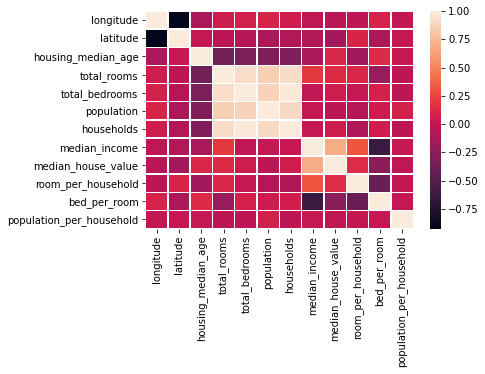

In [175]:
sns.heatmap(cor_mat, linewidths=0.5)

In [176]:
# df_copy.drop(['bed_per_room', 'population_per_household'], axis=1, inplace=True)

In [177]:
# so we discovered a strong relation with the combination of room_per_household +ve relation
# and we discovered a strong relation with the combination of bed_per_room -ve relation

# Now, we reached the end of this round of exploration, 

### Prepare data for the ML algorithm

#### separate the labels

In [178]:
# we need to make a clear copy of our training dataframe without our target values(labels) away from predictors.
# i.e. separate the labels away from the data itself of training(predictors)

df_train_attrs = df_train.drop('median_house_value', axis=1)
labels = df_train.median_house_value.copy()

#### data cleaning

In [179]:
df_train_attrs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [180]:
# we aim to remove the object (non-numeric attributes) temporarly to perform the filling of missing values on dataset.
df_train_attrs_num = df_train_attrs.drop('ocean_proximity', axis=1)

from sklearn.impute import SimpleImputer
imputer_obj = SimpleImputer(strategy='median') # where the strategy is the hyperparameter.
numpy_arr = imputer_obj.fit_transform(df_train_attrs_num)

In [181]:
df_train_attrs_num = pd.DataFrame(numpy_arr, columns=df_train_attrs_num.columns)

In [ ]:
pd.DataFrame()

In [535]:
df_train_attrs_num.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [182]:
df_train_attrs_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


In [40]:
# handle the missing values,   another tool.
# you need to keep the median value to be used to replace missing values in the testing dataset andd the missing values possibly got when the system goes live.
median_val = df_train_attrs.total_bedrooms.median()
df_train_attrs.total_bedrooms.fillna(median_val, inplace=True)
df_train_attrs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


#### Handling the categorical attributes, why? Because ML algorithms work better with numbers. 

In [183]:
from sklearn.preprocessing import OrdinalEncoder

In [184]:
ordCoder = OrdinalEncoder() # now we created the object.
cat_att = df_train_attrs[['ocean_proximity']] # it should be in 2-D format.
# print(cat_att)
ordCoder.fit_transform(cat_att)

array([[0.],
       [0.],
       [4.],
       ...,
       [1.],
       [0.],
       [3.]])

In [185]:
# to see the encoded categories, use .categories instance
ordCoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [186]:
# becasue we don't have on ordinal categorical attribute like: 'bad', 'good', 'fair', 'excellent' and so on
# but, actually we have a normal categorical attribute called 'ocean_proximity' 
# so it's better for our ML algorithm to use the onehotencoder instead.

from sklearn.preprocessing import OneHotEncoder
oneCoder = OneHotEncoder()
cat_att = df_train_attrs[['ocean_proximity']] # it's extracted as a dataframe not 1-d numpy array with double squaree brackets.
coded_att = oneCoder.fit_transform(cat_att)

In [187]:
coded_att # sparse scipy matrix like 2-d array.  to be converted to 1-d numpy array we use .toarraay()
coded_att.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [188]:
oneCoder.categories_ # to see the encoded categories in OneHotEncoder.

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#### Custom transforms using class definition , here we aim to defne a custom class=transformer.

In [189]:
from sklearn.base import BaseEstimator, TransformerMixin # Baseestimator allow for accepting hyperparameters in the defined class object, TransformerMixin allows for the definition of the fit, transform functions of a transformer.
room_idx, bed_idx, populatoin_idx, house_idx = 3, 4, 5, 6 # there positons in the dataframe columns order starting from zero.

class attributeCombiner(BaseEstimator, TransformerMixin):
      def __init__(self, bed_per_room=True):
            # due to the passing of the baseEstimator as a parameter so we can define a hyperparameter to our class object.
            self.bed_per_room = bed_per_room
      def fit(self, X , y=None):
          # X is the dataframe in format of a numpy array: X = df.values
          return self
      def transform(self, X, y=None):
          # equivalent to dividing the column of the room by the column of the households: df.new_col =  df.room / df.house to genrate a new combined attribute in the dataframe
          room_per_house = X[:, room_idx] / X[:, house_idx]
          population_per_house = X[:, populatoin_idx] / X[:, house_idx]
          if self.bed_per_room: # if the user wants to generate this combined attribute.
             bed_per_room = X[:, bed_idx] / X[:, room_idx]
             return np.c_[X, room_per_house, population_per_house, bed_per_room]
          else:
                return np.c_[X, room_per_house, population_per_house]

In [493]:
len(df_train_attrs.values[0])

9

#### To test our custom defined transformer.

In [191]:
attCombiner = attributeCombiner(bed_per_room=False) # here we disabled/enabled the creation of the bed_per_room attribute.
attrs_created = attCombiner.transform(df_train_attrs.values)

In [192]:
attrs_created_df = pd.DataFrame(attrs_created, columns=list(df_train_attrs.columns)+['room_per_house', 'population_per_house'])

In [193]:
attrs_created_df.head() # we can see here our trasformed dataframe after attributes combination.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,room_per_house,population_per_house
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


In [194]:
attrs_created_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   longitude             16512 non-null  object
 1   latitude              16512 non-null  object
 2   housing_median_age    16512 non-null  object
 3   total_rooms           16512 non-null  object
 4   total_bedrooms        16354 non-null  object
 5   population            16512 non-null  object
 6   households            16512 non-null  object
 7   median_income         16512 non-null  object
 8   ocean_proximity       16512 non-null  object
 9   room_per_house        16512 non-null  object
 10  population_per_house  16512 non-null  object
dtypes: object(11)
memory usage: 1.4+ MB


In [86]:
# df_train_attrs['total_bedrooms'] = df_train_attrs_num['total_bedrooms'].copy()
median = df_train_attrs.total_bedrooms.median()
attrs_created_df.total_bedrooms.fillna(median, inplace=True)

In [196]:
attrs_created_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,room_per_house,population_per_house
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


#### here we need to adjust the feature scaling because we noticed that many features have different scales
#### in fact we noticed the skewness in the feature scaling.

In [197]:
from sklearn.preprocessing import MinMaxScaler # generates a normalized values between 0-1, it's affected with outliers but, it can generate values with customized range using the hyperparameter feature_range if needed.
from sklearn.preprocessing import StandardScaler # generates a values = x-mean/st.div is not affected with outliers but it's not bound to a specific range.

from sklearn.pipeline import Pipeline
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')), 
                      ('attrs_combiner', attributeCombiner()), 
                      ('std_scale', StandardScaler())
                     ])
num_pipeline.fit_transform(df_train_attrs_num) # all these pipline phases will be implemented on the numerical attributes of the training dataframe only.

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

#### define columnTransformer in sklean>=.20 version to apply all needed transformations on both the numerical and categorical like this:

In [198]:
from sklearn.compose import ColumnTransformer
num_cols = list(df_train_attrs_num)
cat_cols = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_cols), #num_attrs = numerical attrubutes pipeline defined in the above cell.
    ('cat', OneHotEncoder(), cat_cols)
])

In [199]:
list(df_train_attrs.describe())

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [200]:
final_data = full_pipeline.fit_transform(df_train_attrs)

In [201]:
final_data # now we could apply all needed transformations on all attributes given in the dataset numerical and categorical.

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

#### Select a model and train, fine-tune it.

In [202]:
# let's start with a linear regression model.
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression() # we created a linear regression model object to be trained.
model_LR.fit(final_data, labels)

LinearRegression()

#### Let's try this model using some training examples. 

In [203]:
some_training_samples = df_train_attrs.iloc[:5] # select the first 5 samples
samples_label = labels.iloc[:5] # get there corresponding labels

In [204]:
some_training_samples.head() # still a pure data that needs to be transformed using our full pipeline created above.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [205]:
df_train_attrs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [206]:
samples_training_transformed = full_pipeline.transform(some_training_samples)

In [207]:
samples_training_transformed.shape, final_data.shape

((5, 16), (16512, 16))

In [212]:
model_LR.predict(samples_training_transformed)

array([210644.60459286, 317768.80697211, 210956.43331178,  59218.98886849,
       189747.55849879])

In [213]:
samples_label

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64

#### we try to evaluate the model performance on the whole training dataset like this:

This is an example of the model underfitting

In [254]:
from sklearn.metrics import mean_squared_error # we use RMSE metric as a performance measure sqrt(1/m * (h(xi) -  yi)^2)

training_samples_predictions = model_LR.predict(final_data)
val = mean_squared_error(labels, training_samples_predictions)
print('RMSE output of Linear Regressor: %f' % np.sqrt(val))

RMSE output of Linear Regressor: 68628.198198


let's try to use a more complex model as a 1st option: like: Desicion Tree Regressor

In [231]:
from sklearn.tree import DecisionTreeRegressor

model_DTR = DecisionTreeRegressor()
model_DTR.fit(final_data, labels)

DecisionTreeRegressor()

evalute the model prediction on sample of the training dataset

In [232]:
model_DTR.predict(samples_training_transformed)

array([286600., 340600., 196900.,  46300., 254500.])

In [237]:
samples_label.values # it generated 100% fit on the training dataset sample

array([286600., 340600., 196900.,  46300., 254500.])

now we try our model evaluation on the whole training dataset

An example of the overfitting on the training dataset.

In [239]:
DTR_predictions = model_DTR.predict(final_data)
val_RMSE_DTR = mean_squared_error(labels, DTR_predictions)
print('DTRegressor RMSE output %f'% val_RMSE_DTR) # it generated 100% fit on the training dataset

DTRegressor RMSE output 0.000000


here we want to try **evaluating our model** against the **overfitting problem**

In [248]:
from sklearn.model_selection import train_test_split

train_train, test_train, train_t_labels, test_t_labels = train_test_split(df_train_attrs, labels, test_size=0.2, random_state=42)
train_train.shape, test_train.shape, train_t_labels.shape, test_t_labels.shape

((13209, 9), (3303, 9), (13209,), (3303,))

In [250]:
train_train_final = full_pipeline.transform(train_train)
model_DTR.fit(train_train_final, train_t_labels)

DecisionTreeRegressor()

Zero% error on the training_training dataset

In [251]:
t_t_predictions = model_DTR.predict(train_train_final)
val = mean_squared_error(train_t_labels, t_t_predictions)
print('val = %f'%np.sqrt(val))

val = 0.000000


In [252]:
test_train_final = full_pipeline.transform(test_train)
test_t_predictions = model_DTR.predict(test_train_final)

In [253]:
val = mean_squared_error(test_t_labels, test_t_predictions)
print('val = %f'% np.sqrt(val))

val = 69817.088138


We concluded that our DesicionTreeRegressor model is overfitting our data and it generated an overall error that is greater than the **LinearRegressionModel** itself **!**

Another technique is to use the k-fold cross-validation method that helps you to evaluate your model within the training dataset only multiple **times** (i.e. k= **timesValue**)

In [276]:
model_DTR.fit(final_data, labels)

DecisionTreeRegressor()

In [281]:
from sklearn.model_selection import cross_val_score # crossvalscore is a utility function not a cost function so the greater the better for this reason we compute -score

score_model_DTR  = cross_val_score(model_DTR, final_data, labels, scoring='neg_mean_squared_error', cv=10, )

In [282]:
var = np.sqrt(-score_model_DTR)
# -score_model_DTR
print('mean_score: %f'%var.mean())
print('with_st_dev: %f'%var.std())

mean_score: 71348.265957
with_st_dev: 2300.142119


the same technique to be tried with the linear regression model.

In [283]:
model_LR.fit(final_data, labels)

LinearRegression()

In [284]:
scores_LR = cross_val_score(model_LR, final_data, labels, scoring='neg_mean_squared_error', cv=10)
scores_LR = np.sqrt(-scores_LR)

In [286]:
print('mean_score: %f'%scores_LR.mean())
print('with_st_dev: %f'%scores_LR.std())

mean_score: 69052.461363
with_st_dev: 2731.674002


let's the randomforestregressor which is the strongest model.

In [287]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor()

In [288]:
model_RFR.fit(final_data, labels)

RandomForestRegressor()

Evaluating the RFRegressor on training dataset

In [291]:
RFR_predictions = model_RFR.predict(final_data)
score = mean_squared_error(RFR_predictions, labels)
print('RFRegressor RMSE on Training dataset: %f'%np.sqrt(score))

RFRegressor RMSE on Training dataset: 18720.771048


In [296]:
RFR_score = cross_val_score(model_RFR, final_data, labels, scoring='neg_mean_squared_error', cv=10)
RFR_score = np.sqrt(-RFR_score)
mean_score = RFR_score.mean()
std = RFR_score.std()
print('RFRegressor RMSE using cross validation mean: %f'%mean_score)
print('RFRegressor RMSE using cross validation mean: st dev: %f'%std)

RFRegressor RMSE using cross validation mean: 50269.657056
RFRegressor RMSE using cross validation mean: st dev: 1949.939880


### we concluded that :
on training dataset: DTR < RFR < LM <br>
on cross validation stage: RFR < LM < DTR

Of course: the optimal results on cross validation is about the **random forest regressor**

#### we start to save our models using the joblib library in sklearn.

In [299]:
import joblib # to save our trained models.

In [306]:
for model in (model_RFR, model_DTR, model_LR):
    joblib.dump(model, '%s'%model+'.pkl')

In [308]:
model_DTR_loaded = joblib.load('DecisionTreeRegressor().pkl')

In [314]:
score_DTR_squared = cross_val_score(model_DTR, final_data, labels, scoring='neg_mean_squared_error', cv=10)

In [315]:
score_DTR = np.sqrt(-score_DTR_squared)

In [316]:
score_DTR.mean()

71005.48636288811

In [317]:
score_DTR_loaded_squared = cross_val_score(model_DTR_loaded, final_data, labels, scoring='neg_mean_squared_error', cv=10)

In [318]:
score_DTR_loaded = np.sqrt(-score_DTR_loaded_squared)

In [319]:
score_DTR_loaded.mean()

71070.37719486681

In [320]:
model_RFR_loaded = joblib.load('RandomForestRegressor().pkl')

In [321]:
score_RFR_loaded_squared = cross_val_score(model_RFR_loaded, final_data, labels, scoring='neg_mean_squared_error', cv=10)

In [322]:
score_RFR_loaded = np.sqrt(-score_RFR_loaded_squared)

In [323]:
score_RFR_loaded.mean()

50248.590077474335

#### Let's try the support vector machine model

In [324]:
from sklearn import svm

In [340]:
model_svm = svm.SVR() # we created a svm model for regression not classification : SVRegression
model_svm.fit(final_data, labels)

SVR()

we want to evaluate the svm model on training dataset.

In [341]:
svm_predict = model_svm.predict(final_data)

In [344]:
score_svm_squared = cross_val_score(model_svm, final_data, labels, scoring='neg_mean_squared_error', cv=10)

In [345]:
score_svm = np.sqrt(-score_svm_squared)

In [346]:
print(score_svm.mean())
print(score_svm.std())

118572.66762937943
2936.8775867949425


In [342]:
predictions_svm = mean_squared_error(labels, svm_predict)

In [343]:
np.sqrt(predictions_svm)

118580.68301157995

#### Let's try the Neural Network MLPRegressor.

In [347]:
from sklearn.neural_network import MLPRegressor

In [365]:
model_NN = MLPRegressor(alpha=0.05)

In [366]:
model_NN.fit(final_data, labels)

C:\Users\kaban\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(alpha=0.05)

Try evaluating the NNRegressor model on training dataset

In [367]:
NN_predict = model_NN.predict(final_data)
NN_score_training = mean_squared_error(labels, NN_predict)
np.sqrt(NN_score_training)

167277.80583498016

In [368]:
NN_score_squared = cross_val_score(model_NN, final_data, labels, scoring='neg_mean_squared_error', cv=10)

C:\Users\kaban\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kaban\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kaban\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kaban\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kaban\anaconda3\lib\site-packages\sklearn\neural_network\_multi

In [369]:
NN_score = np.sqrt(-NN_score_squared)

In [370]:
print('NN Mean: %f'%NN_score.mean())
print('NN std: %f'%NN_score.std())

NN Mean: 172497.101607
NN std: 5223.553844


saving the trained models of the SVM, NueralNetwork NN

In [371]:
joblib.dump(model_svm, '%s'%model_svm+'.pkl')
joblib.dump(model_NN, '%s'%model_NN+'.pkl')

['MLPRegressor(alpha=0.05).pkl']

Here we implement our fine-tuning grid search: as the following:

In [374]:
from sklearn.model_selection import GridSearchCV

# here we define 2 possible hyperparameters dictionaries with different possible values of parameters for the RFR model
params_gridSearch_RFR = [
    {'n_estimators':[5, 10, 50, 100], 'max_features':[2, 4, 6, 8, 10, 12]},
    {'bootstrap':[False], 'n_estimators':[2, 4], 'max_features':[2, 4, 6]}
]

# now create a RFRegressor object to be trained
RFR_obj = RandomForestRegressor()
gridSearch_RFR = GridSearchCV(RFR_obj, params_gridSearch_RFR, cv=5, scoring='neg_mean_squared_error', return_train_score=True) 

In [375]:
# now we are fine-tuning our RFR model by trying multiple hyperparameters for the RFR as we specified above
# and then, the GridSearchCV library starts to select the optimal hyperparameters of themodel based on the results of the cross-validation
gridSearch_RFR.fit(final_data, labels)
gridSearch_RFR.best_params_

{'max_features': 6, 'n_estimators': 100}

here we want to explore the results of the grid search cross validation at each training round.

In [391]:
cvresults = gridSearch_RFR.cv_results_

In [393]:
for mean_score, corres_params in zip(cvresults['mean_test_score'], cvresults['params']):
    print('mean_score %f'%(np.sqrt(-mean_score)), 'corresponding_params %s'%(corres_params))

mean_score 59317.124514 corresponding_params {'max_features': 2, 'n_estimators': 5}
mean_score 55949.414966 corresponding_params {'max_features': 2, 'n_estimators': 10}
mean_score 52349.606530 corresponding_params {'max_features': 2, 'n_estimators': 50}
mean_score 51898.356132 corresponding_params {'max_features': 2, 'n_estimators': 100}
mean_score 56228.724337 corresponding_params {'max_features': 4, 'n_estimators': 5}
mean_score 53351.127099 corresponding_params {'max_features': 4, 'n_estimators': 10}
mean_score 50075.714540 corresponding_params {'max_features': 4, 'n_estimators': 50}
mean_score 49755.935032 corresponding_params {'max_features': 4, 'n_estimators': 100}
mean_score 55025.322685 corresponding_params {'max_features': 6, 'n_estimators': 5}
mean_score 52417.885403 corresponding_params {'max_features': 6, 'n_estimators': 10}
mean_score 49367.690866 corresponding_params {'max_features': 6, 'n_estimators': 50}
mean_score 49208.510500 corresponding_params {'max_features': 6, '

In [401]:
np.sqrt(-gridSearch_RFR.best_score_), gridSearch_RFR.best_params_, gridSearch_RFR.best_index_

(49208.51050018301, {'max_features': 6, 'n_estimators': 100}, 11)

####  We could fine-tune our RFR model by selecting the best_parameters for our model as specified above.

#### now we try fine-tuning through the RandomSearchCV
this technique is slightly different from the gridsearchcv how?
it generates a random value for the hyperparameters within each iteration instead of specifying certain combinations only
so, our search space is greater(i.e. bigger space)

In [820]:
from sklearn.model_selection import RandomizedSearchCV

In [821]:
from scipy.stats import randint #  to generate a random range of integer values to be used.

In [834]:
params_distrs_randsearchCV_RFR = [
    {'n_estimators':randint(low=1, high=200), 'max_features':randint(low=1, high=6)}
]
RFR_obj_ = RandomForestRegressor()
randomSearchCV_RFR = RandomizedSearchCV(RFR_obj_, params_distrs_randsearchCV_RFR, cv=10, scoring='neg_mean_squared_error', return_train_score=True, random_state=42)

In [418]:
randomSearchCV_RFR.fit(final_data, labels)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions=[{'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022834F776A0>,
                                         'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022824C22B50>}],
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error')

#### now we aim to print the results of the random search cv using our RFRegressor model.

In [419]:
cvresults_randomSearch = randomSearchCV_RFR.cv_results_

In [429]:
for valid_mean_score, params_corres in zip(cvresults_randomSearch['mean_test_score'], cvresults_randomSearch['params']):
    print('mean_test_score: % s'%np.sqrt(-valid_mean_score), 'params: %s'%params_corres)

mean_test_score: 48752.14520759242 params: {'max_features': 7, 'n_estimators': 180}
mean_test_score: 48946.410104937204 params: {'max_features': 8, 'n_estimators': 189}
mean_test_score: 48969.00862636985 params: {'max_features': 5, 'n_estimators': 103}
mean_test_score: 50244.99491309132 params: {'max_features': 3, 'n_estimators': 75}
mean_test_score: 48935.29303905881 params: {'max_features': 8, 'n_estimators': 117}
mean_test_score: 49325.36507283067 params: {'max_features': 4, 'n_estimators': 104}
mean_test_score: 48873.744125168596 params: {'max_features': 8, 'n_estimators': 131}
mean_test_score: 49322.59744704783 params: {'max_features': 6, 'n_estimators': 53}
mean_test_score: 51508.27324858129 params: {'max_features': 2, 'n_estimators': 88}
mean_test_score: 48885.250507057375 params: {'max_features': 6, 'n_estimators': 130}


In [445]:
features_importances = gridSearch_RFR.best_estimator_.feature_importances_

In [569]:
features_importances

array([7.84253776e-02, 7.13408230e-02, 4.17135058e-02, 1.82427091e-02,
       1.69191556e-02, 1.82006064e-02, 1.64495150e-02, 3.20918886e-01,
       6.64041080e-02, 1.08274614e-01, 7.02553081e-02, 1.13001829e-02,
       1.51698154e-01, 6.11810134e-05, 4.38574688e-03, 5.41012662e-03])

In [441]:
encoded_cat = list(full_pipeline.named_transformers_['cat'].categories_[0]) # we have called the 'cat' estimator which is a part of the full pipeline that performs a OneHotEncoding for our categorical attribute ocean_proximity to get it's encoded categories names.
# .categories_[0] is an attribute of the OneHotEncoder() transformer, that returns the encoded categories of the categorical attribute.

In [442]:
num_cols

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [443]:
# here we will combine the attributes with their corresponding importance in the good predition estimated by the RFR model.
attrs_in_order = num_cols+['room_per_house', 'population_per_house', 'bed_per_room']+encoded_cat

In [444]:
attrs_in_order

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'room_per_house',
 'population_per_house',
 'bed_per_room',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

### These were the importances of each feature in the data including the encoded categorical attribute.
To achieve a better prediction and this is a feature available with the randomtreeregressor RFR model as well as the DTR

In [651]:
x = np.array([3, 2, 1, 4])
x[np.argpartition(x, 2)]

array([1, 2, 3, 4])

In [649]:
np.array(list(zip(features_importances, attrs_in_order)))

array([['0.07842537755952828', 'longitude'],
       ['0.07134082300269605', 'latitude'],
       ['0.0417135058249189', 'housing_median_age'],
       ['0.018242709097327628', 'total_rooms'],
       ['0.016919155593705597', 'total_bedrooms'],
       ['0.018200606413469447', 'population'],
       ['0.016449515046240787', 'households'],
       ['0.3209188860717168', 'median_income'],
       ['0.06640410796065342', 'room_per_house'],
       ['0.10827461396150452', 'population_per_house'],
       ['0.0702553080945674', 'bed_per_room'],
       ['0.01130018286689774', '<1H OCEAN'],
       ['0.1516981539998646', 'INLAND'],
       ['6.118101343224994e-05', 'ISLAND'],
       ['0.004385746875299651', 'NEAR BAY'],
       ['0.00541012661817701', 'NEAR OCEAN']], dtype='<U32')

In [447]:
encoded_cat

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [701]:
sorted(zip(model_DTR.feature_importances_, attrs_in_order), reverse=True)

[(0.47122210560098676, 'median_income'),
 (0.1402623593809112, 'INLAND'),
 (0.1237751260194864, 'population_per_house'),
 (0.06586215646184453, 'longitude'),
 (0.05651450368018336, 'latitude'),
 (0.03971208836472187, 'housing_median_age'),
 (0.027810973750605542, 'room_per_house'),
 (0.022431593245377256, 'bed_per_room'),
 (0.013196488706277197, 'total_bedrooms'),
 (0.012649199256361236, 'households'),
 (0.01191684938302552, 'population'),
 (0.01138797790075599, 'total_rooms'),
 (0.0019241483245296832, 'NEAR OCEAN'),
 (0.0007124065333361815, '<1H OCEAN'),
 (0.0006220233915972106, 'NEAR BAY'),
 (0.0, 'ISLAND')]

Let's try fine-tuning our SVM model

In [458]:
from sklearn.svm import SVR

In [815]:
# here our svr model parameters to be fine-tuned.
params_gridSearch_SVM = [
    {'kernel':['linear', 'rbf'], 
     'C':[1.0, 2.0],
     'epsilon':[0.001, 0.002]
    }, 
    {
     'kernel':['sigmoid'], 
     'C':[3.5], 'epsilon':[0.0001]   
    }
]
# we create an object of the model to be fine-tuned. SVRegressor.
model_svm_gridSearch = SVR()
# create the GridSearchCV object with it's charactaristics.
gridSearch_SVM = GridSearchCV(model_svm_gridSearch, params_gridSearch_SVM, scoring='neg_mean_squared_error', cv=5, return_train_score=True, verbose=1)

In [816]:
# let's fine-tune our SVR model now.
gridSearch_SVM.fit(final_data, labels)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 10.3min finished


GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [1.0, 2.0], 'epsilon': [0.001, 0.002],
                          'kernel': ['linear', 'rbf']},
                         {'C': [3.5], 'epsilon': [0.0001],
                          'kernel': ['sigmoid']}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [818]:
np.sqrt(-gridSearch_SVM.best_score_), gridSearch_SVM.best_params_

(107136.28488169408, {'C': 2.0, 'epsilon': 0.002, 'kernel': 'linear'})

#### Trying to create a new custom transformer to select the most important attributes only and to ignore the other less ones.

In [797]:
from sklearn.base import BaseEstimator, TransformerMixin

class selectAttrs(BaseEstimator, TransformerMixin): 
      def __init__(self, turn_on_or_off=False, feature_importances=None, alpha=0.45):
          self.turn_on_or_off = turn_on_or_off
          self.feature_importances = feature_importances
          self.alpha = alpha  # alpha represents the percent of removal of unnecessary attributes. 
      def fit(self, X, y=None):
          # we aim to compute a preprocessing step before changing our numpy array structure by being transformed.
          self.kth_idx = int(np.floor((len(self.feature_importances)*self.alpha)))
          self.index_top_attrs = np.sort(np.argsort(self.feature_importances)[self.kth_idx: ]) # because importances are sorted ascendingly.
          return self
      def transform(self, X, y=None):
          # in case we have already known the contribution of each attribute in the model better prediction.
          if self.turn_on_or_off: 
             return X[:, self.index_top_attrs]
          else:
             return X   
             

In [798]:
arr_data_before = full_pipeline.transform(df_train_attrs)
arr_data_before.shape # so before removal of the unnecessary attributes we got 16 columns.

(16512, 16)

In [799]:
att_removal_transformer = selectAttrs(turn_on_or_off=True, feature_importances=features_importances, alpha=0.7)

In [800]:
att_removal_transformer.fit_transform(final_data)

array([[-1.15604281,  0.77194962, -0.61493744, -0.08649871,  0.        ],
       [-1.17602483,  0.6596948 ,  1.33645936, -0.03353391,  0.        ],
       [ 1.18684903, -1.34218285, -0.5320456 , -0.09240499,  0.        ],
       ...,
       [ 1.58648943, -0.72478134, -0.3167053 , -0.03055414,  1.        ],
       [ 0.78221312, -0.85106801,  0.09812139,  0.06150916,  0.        ],
       [-1.43579109,  0.99645926, -0.15779865, -0.09586294,  0.        ]])

In [801]:
idx = int(np.floor((len(features_importances)*0.70)))

In [802]:
sorted(zip(features_importances, attrs_in_order), reverse=True)[:-idx]

[(0.3209188860717168, 'median_income'),
 (0.1516981539998646, 'INLAND'),
 (0.10827461396150452, 'population_per_house'),
 (0.07842537755952828, 'longitude'),
 (0.07134082300269605, 'latitude')]

In [803]:
sorted(zip(features_importances, attrs_in_order), reverse=True)

[(0.3209188860717168, 'median_income'),
 (0.1516981539998646, 'INLAND'),
 (0.10827461396150452, 'population_per_house'),
 (0.07842537755952828, 'longitude'),
 (0.07134082300269605, 'latitude'),
 (0.0702553080945674, 'bed_per_room'),
 (0.06640410796065342, 'room_per_house'),
 (0.0417135058249189, 'housing_median_age'),
 (0.018242709097327628, 'total_rooms'),
 (0.018200606413469447, 'population'),
 (0.016919155593705597, 'total_bedrooms'),
 (0.016449515046240787, 'households'),
 (0.01130018286689774, '<1H OCEAN'),
 (0.00541012661817701, 'NEAR OCEAN'),
 (0.004385746875299651, 'NEAR BAY'),
 (6.118101343224994e-05, 'ISLAND')]

In [804]:
arr_data_after = att_removal_transformer.fit_transform(final_data)
arr_data_after.shape

(16512, 5)

In [805]:
final_data

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

### We aim here to define a full pipeline to integrate the attribute selector transformer to our full pipeline defined before.

In [810]:
final_pipeline = Pipeline([
    ('est_1', full_pipeline),
    ('est_2', selectAttrs(turn_on_or_off=True, feature_importances=features_importances, alpha=0.70))
])

In [811]:
final_data_ = final_pipeline.fit_transform(df_train_attrs)

In [812]:
final_data_.shape

(16512, 5)

### It's the time to evaluate our promising model RFRegressor on the testing dataset. it's the final step.

In [836]:
#  let's train our RFR model again on the new final_pipeline data preparation and to fine-tune again.

In [826]:
# we need to reimplement the randomized search cv agin to fine-tune our model after re-preparing our dataset.

In [835]:
randomSearchCV_RFR.fit(final_data_, labels)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions=[{'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002282640E100>,
                                         'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002282877FCD0>}],
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [837]:
np.sqrt(-randomSearchCV_RFR.best_score_), randomSearchCV_RFR.best_params_

(49167.88084733971, {'max_features': 2, 'n_estimators': 192})

In [838]:
for score, param in zip(randomSearchCV_RFR.cv_results_['mean_test_score'], randomSearchCV_RFR.cv_results_['params']):
    print('mean_score: %.2f'%np.sqrt(-score), 'params: %s'%param)

mean_score: 50437.37 params: {'max_features': 4, 'n_estimators': 93}
mean_score: 49870.67 params: {'max_features': 3, 'n_estimators': 72}
mean_score: 51958.84 params: {'max_features': 5, 'n_estimators': 21}
mean_score: 49411.68 params: {'max_features': 2, 'n_estimators': 75}
mean_score: 49782.22 params: {'max_features': 3, 'n_estimators': 88}
mean_score: 51012.76 params: {'max_features': 5, 'n_estimators': 100}
mean_score: 49738.21 params: {'max_features': 3, 'n_estimators': 150}
mean_score: 61757.59 params: {'max_features': 5, 'n_estimators': 2}
mean_score: 50191.43 params: {'max_features': 4, 'n_estimators': 158}
mean_score: 49167.88 params: {'max_features': 2, 'n_estimators': 192}


In [839]:
model_RFR = RandomForestRegressor(n_estimators=100, max_features=1).fit(final_data_, labels)

In [866]:
model_RFR_ = randomSearchCV_RFR.best_estimator_ # to get the final RFR trained model to be used for prediction of test set.

Staring to prepare our test dataset

In [852]:
df_test.drop('income_cut' , axis=1, inplace=True)

In [853]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 5241 to 2398
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4079 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


In [854]:
# removing the test dataset labels ( i.e. madian_house_value)
df_test_attrs = df_test.drop('median_house_value', axis=1)
df_test_attrs

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,<1H OCEAN
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,<1H OCEAN
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,<1H OCEAN
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,INLAND
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,INLAND
...,...,...,...,...,...,...,...,...,...
20519,-121.53,38.58,33.0,4988.0,1169.0,2414.0,1075.0,1.9728,INLAND
17430,-120.44,34.65,30.0,2265.0,512.0,1402.0,471.0,1.9750,NEAR OCEAN
4019,-118.49,34.18,31.0,3073.0,674.0,1486.0,684.0,4.8984,<1H OCEAN
12107,-117.32,33.99,27.0,5464.0,850.0,2400.0,836.0,4.7110,INLAND


In [860]:
# we shoukd store our test dataset labels
test_labels = df_test.median_house_value.copy()

In [857]:
### Implement the final data preparation stages using our final_pipeline object.

final_data_test = final_pipeline.transform(df_test_attrs)
final_data_test.shape, final_data_test # Transformed successfully.

((4128, 5),
 array([[ 0.59238393, -0.71074948,  2.31299771, -0.07090847,  0.        ],
        [ 0.8571457 , -0.87445443,  0.38611673, -0.04598303,  0.        ],
        [ 0.26268061, -0.66865392, -0.45340597, -0.05936925,  0.        ],
        ...,
        [ 0.54242889, -0.68268578,  0.53693893, -0.07975525,  0.        ],
        [ 1.12690297, -0.77155418,  0.43856065, -0.01947641,  1.        ],
        [ 0.33261768,  0.53808541, -0.0471887 , -0.06551332,  1.        ]]))

# It's the time to evaluate our RFR model within the final stage using our transformed test dataset.

In [858]:
final_predictions = model_RFR.predict(final_data_test)

In [881]:
final_predictions[324: 330]

array([ 78183.  , 131637.  , 251063.01, 454788.52, 110116.  , 196311.  ])

In [880]:
np.array(test_labels)[324: 330]

array([ 78600., 129800., 198600., 500001., 108900., 209100.])

In [882]:
# evalutaing our model predictions.
mean_test_score = mean_squared_error(test_labels, final_predictions)

In [883]:
np.sqrt(mean_test_score)

46799.542986033404

In [884]:
joblib.dump(model_RFR, 'model_RFR_Final.pkl')

['model_RFR_Final.pkl']

Done!